<a href="https://colab.research.google.com/github/azarcoder/pytorch_udemy/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Linear Regression Model using PyTorch to predict medical insurance costs based on people's data (age, sex, BMI, etc.).

# pipeline
1. Collect data
2. Data preprocessing
3. Feature engineering
4. Model Training
5. Testing  

  - **dataset** [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)
  

In [ ]:
!pip install kaggle

In [1]:
from google.colab import files
files.upload()  # Upload your kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"azar1538","key":"778ee889c009c655ea869fbf7797664e"}'}

In [2]:
import os
# Step 1: Create the correct Kaggle config directory
os.makedirs('/root/.config/kaggle', exist_ok=True)

In [3]:
# Step 2: Move the uploaded kaggle.json to the correct location
!mv kaggle.json /root/.config/kaggle/

In [4]:
# Set correct permissions
!chmod 600 /root/.config/kaggle/kaggle.json

In [ ]:
#list all dataset
! kaggle datasets list

In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi
# Authenticate and use the API
api = KaggleApi()
api.authenticate()

# Create a folder for the dataset
dataset_path = "./insurance_data"
os.makedirs(dataset_path, exist_ok=True)

# Download and unzip the dataset
api.dataset_download_files('mirichoi0218/insurance', path=dataset_path, unzip=True)

print(f"✅ Dataset downloaded and extracted to: {dataset_path}")

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
✅ Dataset downloaded and extracted to: ./insurance_data


In [6]:
#view file

files = os.listdir('./insurance_data')
print(files)

['insurance.csv']


In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('./insurance_data/insurance.csv')

# Display the first few rows
df.head()
# df.describe()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

'''
Convert text to numbers (LabelEncoder)

Normalize values (StandardScaler)

Split data into training and testing (train_test_split)
'''

In [9]:
#split dataset before encoding
'''
train_test_split()	A function from sklearn.model_selection used to split data into training and testing sets.
test_size=0.2	Means 20% of the data will go into the test set, and the remaining 80% will be for training.
random_state=42	A seed to make the split reproducible. If you use the same random_state, you'll always get the same split every time you run the code.
'''
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [10]:
#Encode categorical variable
'''
Many machine learning models can’t handle categorical text like "male" or "yes" directly — they need numerical values.

This code converts categorical columns like 'sex', 'smoker', and 'region' into numbers.
'''
lebel_encoder = {}
for col in ['sex', 'smoker', 'region']:
  lebel_encoder[col] = LabelEncoder()
  train_df[col] = lebel_encoder[col].fit_transform(train_df[col])
  '''
  train_df['sex'] → ['male', 'female', 'male']
  becomes
  train_df['sex'] → [1, 0, 1]

  '''
  #Apply the same encoder to the test set.
  test_df[col] = lebel_encoder[col].transform(test_df[col])


In [ ]:
# print(LabelEncoder().fit_transform(['male', 'female']))

['female' 'female' 'female' ... 'male' 'female' 'male']


In [11]:
# Features and target

x_train = train_df.drop(columns=['charges'])
y_train = train_df['charges']

x_test = test_df.drop(columns=['charges'])
y_test = test_df['charges']


In [14]:
print(x_train.head())
print(y_train.head())

      age  sex    bmi  children  smoker  region
560    46    0  19.95         2       0       1
1285   47    0  24.32         0       0       0
1142   52    0  24.86         0       0       2
969    39    0  34.32         5       0       2
486    54    0  21.47         3       0       1
560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64


In [15]:
#normalize feature

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_text = scaler.transform(x_test)


In [17]:
print(x_train)

[[ 0.47222651 -1.0246016  -1.75652513  0.73433626 -0.50874702 -0.45611589]
 [ 0.54331294 -1.0246016  -1.03308239 -0.91119211 -0.50874702 -1.35325561]
 [ 0.8987451  -1.0246016  -0.94368672 -0.91119211 -0.50874702  0.44102382]
 ...
 [ 1.3252637   0.97598911 -0.89153925 -0.91119211 -0.50874702 -1.35325561]
 [-0.16755139 -1.0246016   2.82086429  0.73433626  1.96561348  1.33816354]
 [ 1.1120044   0.97598911 -0.10932713 -0.91119211 -0.50874702  1.33816354]]


In [20]:
#data only works in tensor
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1) #flatten

x_test_tensor = torch.tensor(x_text, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [24]:
print(y_train_tensor)
print(y_train_tensor.shape)

print(x_test_tensor)
print(x_test_tensor.shape)

tensor([[ 9193.8389],
        [ 8534.6719],
        [27117.9941],
        ...,
        [11931.1250],
        [46113.5117],
        [10214.6357]])
torch.Size([1070, 1])
tensor([[ 0.4011, -1.0246, -0.8915,  0.7343, -0.5087, -1.3533],
        [-0.2386, -1.0246, -0.0895, -0.9112, -0.5087, -0.4561],
        [ 1.7518, -1.0246, -0.6085, -0.9112,  1.9656, -0.4561],
        ...,
        [-0.0965,  0.9760, -0.4197, -0.0884, -0.5087, -1.3533],
        [ 1.0409, -1.0246,  2.7894, -0.9112,  1.9656,  0.4410],
        [ 0.8277, -1.0246,  0.6025, -0.0884, -0.5087,  1.3382]])
torch.Size([268, 6])


In [27]:
class SimpleNNRegressionModel(nn.Module):
  def __init__(self, input_dim):
    super(SimpleNNRegressionModel, self).__init__()
    self.network = nn.Sequential(
      nn.Linear(input_dim, 64),
      nn.ReLU(),
      nn.Linear(64, 128),
      nn.ReLU(),
      nn.Linear(128, 1)
    )

  def forward(self, x):
    return self.network(x)

'''
Input layer → 64 neurons → ReLU

Hidden layer → 128 neurons → ReLU

Output → 1 number (insurance charge)
'''

In [28]:

x_train_tensor.shape

torch.Size([1070, 6])

In [31]:
input_dim = x_train_tensor.shape[1]
model = SimpleNNRegressionModel(input_dim)

In [32]:
print(model)

SimpleNNRegressionModel(
  (network): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
  )
)


In [34]:
#loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

'''
Loss function = how wrong the prediction is (MSE = Mean Squared Error)

Optimizer = improves the model by learning (Adam is a smart optimizer)
'''

In [35]:
#training loop

epochs = 10000
for e in range(epochs):
  model.train()
  optimizer.zero_grad()
  predictions = model(x_train_tensor)
  loss = criterion(predictions, y_train_tensor)
  loss.backward()
  optimizer.step()

  if (e+1) % 100 == 0:
    print(f'Epoch {e}, Loss: {loss.item()}')

Epoch 99, Loss: 47472324.0
Epoch 199, Loss: 31405228.0
Epoch 299, Loss: 28731418.0
Epoch 399, Loss: 26832536.0
Epoch 499, Loss: 25697270.0
Epoch 599, Loss: 24859516.0
Epoch 699, Loss: 24199956.0
Epoch 799, Loss: 23578772.0
Epoch 899, Loss: 22627194.0
Epoch 999, Loss: 21839646.0
Epoch 1099, Loss: 21235072.0
Epoch 1199, Loss: 20828126.0
Epoch 1299, Loss: 20507280.0
Epoch 1399, Loss: 20242768.0
Epoch 1499, Loss: 19958994.0
Epoch 1599, Loss: 19660592.0
Epoch 1699, Loss: 19335654.0
Epoch 1799, Loss: 19078162.0
Epoch 1899, Loss: 18841620.0
Epoch 1999, Loss: 18662594.0
Epoch 2099, Loss: 18473814.0
Epoch 2199, Loss: 18298142.0
Epoch 2299, Loss: 18096454.0
Epoch 2399, Loss: 17811936.0
Epoch 2499, Loss: 17546706.0
Epoch 2599, Loss: 17338808.0
Epoch 2699, Loss: 17116940.0
Epoch 2799, Loss: 16912140.0
Epoch 2899, Loss: 16703955.0
Epoch 2999, Loss: 16495570.0
Epoch 3099, Loss: 16286410.0
Epoch 3199, Loss: 16071958.0
Epoch 3299, Loss: 15864689.0
Epoch 3399, Loss: 15625262.0
Epoch 3499, Loss: 1533559

In [36]:
#model Evalution

model.eval()
y_pred = model(x_test_tensor).detach().numpy()


In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_test_numpy = y_test_tensor.numpy()

mse = mean_squared_error(y_test_numpy, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test_numpy, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

'''
MSE: Mean of squared errors

RMSE: Square root of MSE (easier to understand)

MAE: Average error

R² Score: How well model explains the data (closer to 1 is better)
'''

MSE: 36006440.0
RMSE: 6000.5366426678875
MAE: 3915.944091796875
R2 Score: 0.7680725788908667


In [41]:
# def predict_charges(age, sex, bmi, children, smoker,region):
#   input_data = pd.DataFrame([[age, sex, bmi, children, smoker,region]],
#                columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

#   for col in ['sex', 'smoker', 'region']:
#     input_data[col] = lebel_encoder[col].transform(input_data[col])
#     input_data = scaler.transform(input_data)
#     input_tensor = torch.tensor(input_data, dtype=torch.float32)
#     predicted_charge = model(input_tensor).item()
#     return predicted_charge

def predict_charges(age, sex, bmi, children, smoker, region):
  input_data = pd.DataFrame([[age, sex, bmi, children, smoker, region]],
               columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

  # Loop through categorical columns and transform them
  for col in ['sex', 'smoker', 'region']:
    input_data[col] = lebel_encoder[col].transform(input_data[col])

  # Scale the numerical features after encoding is complete
  input_data = scaler.transform(input_data)

  # Convert to PyTorch tensor and make prediction
  input_tensor = torch.tensor(input_data, dtype=torch.float32)
  predicted_charge = model(input_tensor).item()
  return predicted_charge

In [48]:
predicted = predict_charges(50, 'female', 27.9, 0, 'no', 'southwest')

In [49]:
print(f"Predicted insurance charge: ${predicted:.2f}")

Predicted insurance charge: $10694.23


# with visuals


In [57]:
# Store losses in a list
losses = []

epochs = 1000  # You can reduce from 10000 for quicker testing
for e in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(x_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (e+1) % 100 == 0:
        print(f'Epoch {e+1}, Loss: {loss.item():.4f}')


Epoch 100, Loss: 5496967.5000
Epoch 200, Loss: 5501136.5000
Epoch 300, Loss: 5500142.5000
Epoch 400, Loss: 5488558.5000
Epoch 500, Loss: 5468381.5000
Epoch 600, Loss: 5446325.0000
Epoch 700, Loss: 5425302.0000
Epoch 800, Loss: 5422812.0000
Epoch 900, Loss: 5424171.5000
Epoch 1000, Loss: 5412710.0000


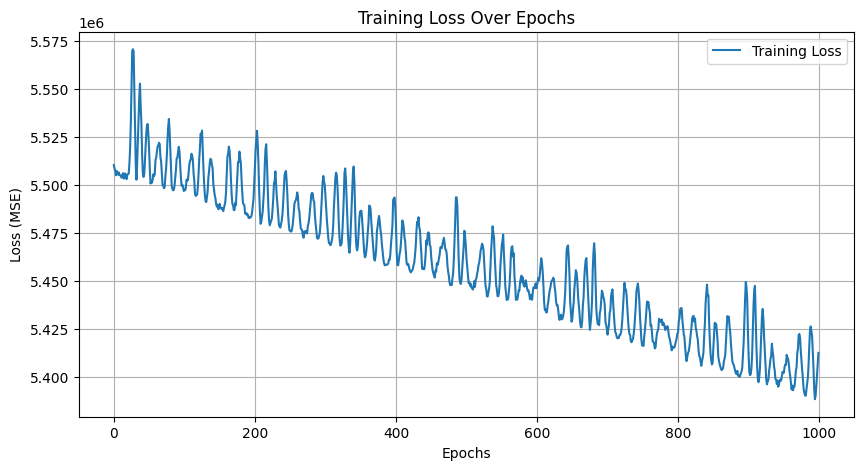

In [58]:
# Plotting the loss curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


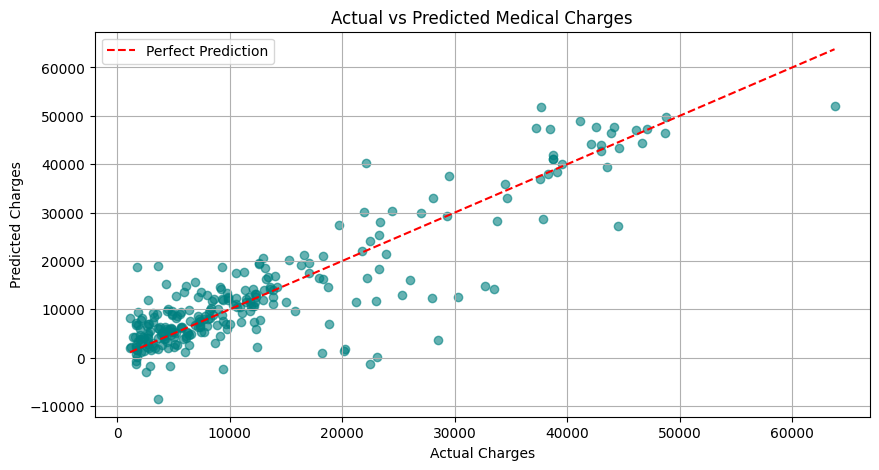

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(y_test_numpy, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.plot([y_test_numpy.min(), y_test_numpy.max()],
         [y_test_numpy.min(), y_test_numpy.max()],
         'r--', label="Perfect Prediction")
plt.legend()
plt.grid(True)
plt.show()
